In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.width', 5000) 
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 7)
from tedutil import isozygio
db = '/home/tedlaz/tmp/samaratot/el1115.sql3'
sql = """select tr.dat as dat, substr(lmo.lmo,1,{0}) as lmo, trd.xr, trd.pi 
from trd 
inner join tr on tr.id=trd.id_tr 
inner join lmo on lmo.id=trd.id_lmo
Where lmo.lmo like '{1}%'"""


/home/tedlaz/prj/env2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


ImportError: No module named tedutil

In [2]:
def calc(lmo, lsize=2, period='y', multiplier=False):
    sqf = sql.format(lsize, lmo)
    aa, stt = isozygio.arr(db, sqf, period)
    asd = pd.DataFrame(aa)
    asd.columns = stt
    asd.set_index('Lmoi', inplace=True)
    asd.index.name = None
    asd = asd.replace('-', 'NaN', regex=True).astype('float')
    if multiplier:
        return asd.T * -1
    else:
        return asd.T

In [3]:
om6 = calc(6)['6']
om6

2011    361173.81
2012    413640.10
2013    236552.77
2014    138171.13
2015    104070.65
Name: 6, dtype: float64

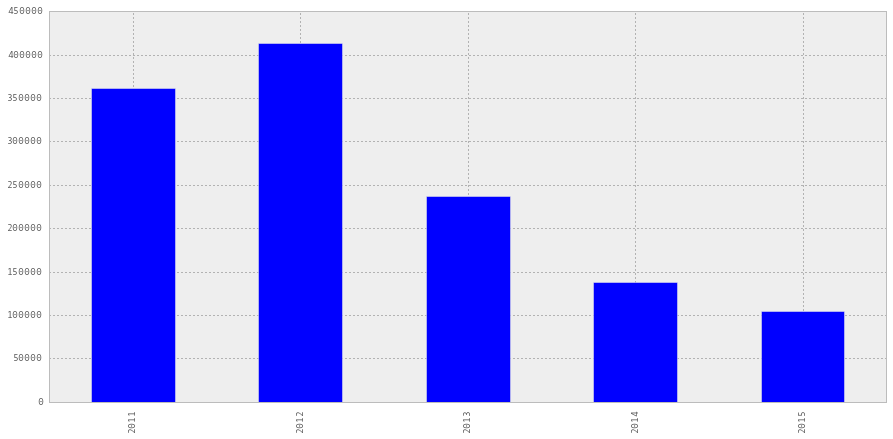

In [4]:
om6.plot(kind='bar')

In [5]:
om7 = calc(7, multiplier=True)['7']
om7

2011     927906.36
2012    1001230.70
2013     459007.22
2014     177336.33
2015     181856.52
Name: 7, dtype: float64

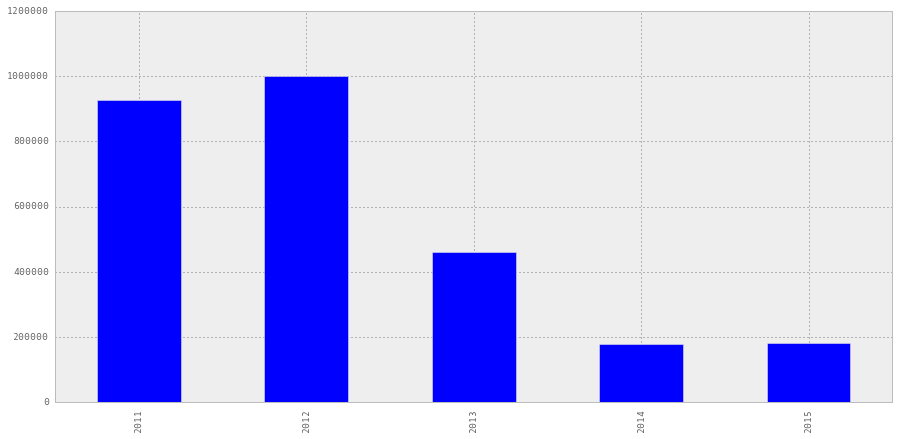

In [6]:
om7.plot(kind='bar')

In [7]:
om2 = calc(2, multiplier=False)['2']
om2

2011    356850.65
2012    537624.97
2013    182630.58
2014     72208.65
2015    109144.74
Name: 2, dtype: float64

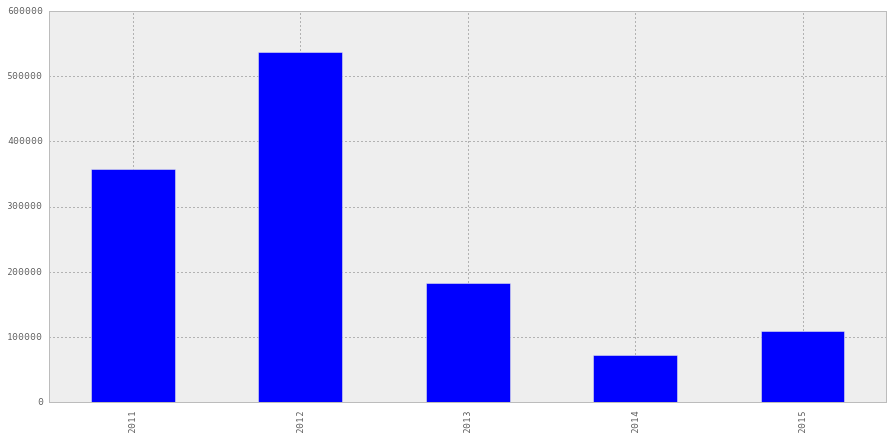

In [8]:
om2.plot(kind='bar')

In [9]:
kpol = pd.Series([356850.21, 537000.12, 182606.41, 107805.77, 127020.26], index=['2011', '2012', '2013', '2014', '2015'])
kerdi = om7 - om6 - kpol
ejoda = om6 + kpol
df = pd.DataFrame({'esoda': om7, 'ejoda': ejoda, 'kerdi': kerdi, 'om6': om6, 'om2': om2, 'kpol': kpol})
df[['esoda', 'ejoda', 'kerdi', 'om6','om2', 'kpol']]

,esoda,ejoda,kerdi,om6,om2,kpol
2011,927906.36,718024.02,209882.34,361173.81,356850.65,356850.21
2012,1001230.70,950640.22,50590.48,413640.10,537624.97,537000.12
2013,459007.22,419159.18,39848.04,236552.77,182630.58,182606.41
2014,177336.33,245976.90,-68640.57,138171.13,72208.65,107805.77
2015,181856.52,231090.91,-49234.39,104070.65,109144.74,127020.26


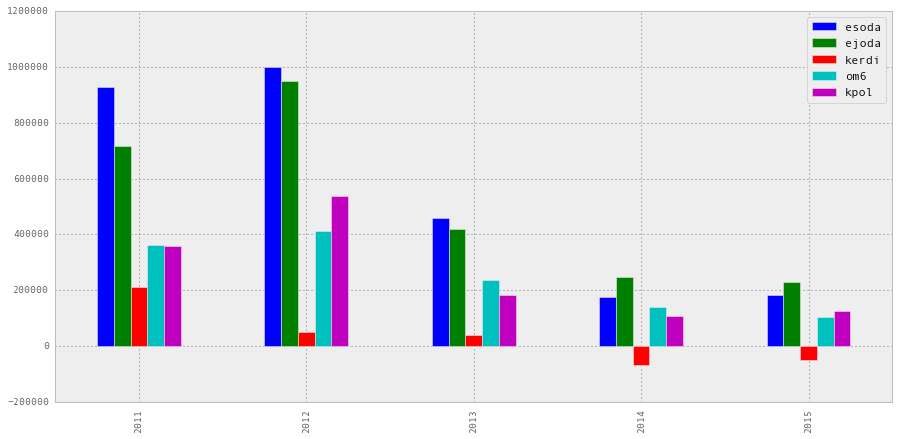

In [10]:
df[['esoda', 'ejoda', 'kerdi', 'om6', 'kpol']].plot(kind='bar')